In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("energyconsumption-201002-134452/energy consumption.csv")

In [3]:
data.head()

,DATE,ENERGY_INDEX
0,01/1939,3.3842
1,02/1939,3.4100
2,03/1939,3.4875
3,04/1939,3.5133
4,05/1939,3.5133


In [4]:
data.shape

(969, 2)

In [6]:
data.tail()

,DATE,ENERGY_INDEX
964,05/2019,91.9046
965,06/2019,98.4397
966,07/2019,112.9469
967,08/2019,111.6645
968,09/2019,102.2911


In [9]:
data.dtypes

DATE             object
ENERGY_INDEX    float64
dtype: object

In [10]:
data['DATE']=pd.to_datetime(data['DATE'])

In [11]:
data.dtypes

DATE            datetime64[ns]
ENERGY_INDEX           float64
dtype: object

968.0034497628288

#### Looking for missing dates in the time series data

In [42]:
import numpy as np
(data["DATE"].iloc[-1]-data["DATE"].iloc[0])/ np.timedelta64(1, 'M')

968.0034497628288

In [44]:
data.index = data["DATE"]

In [46]:
data.drop("DATE",axis=1,inplace=True)

In [47]:
data

,ENERGY_INDEX
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133
...,...
2019-05-01,91.9046
2019-06-01,98.4397
2019-07-01,112.9469


In [48]:
import matplotlib.pyplot as plt

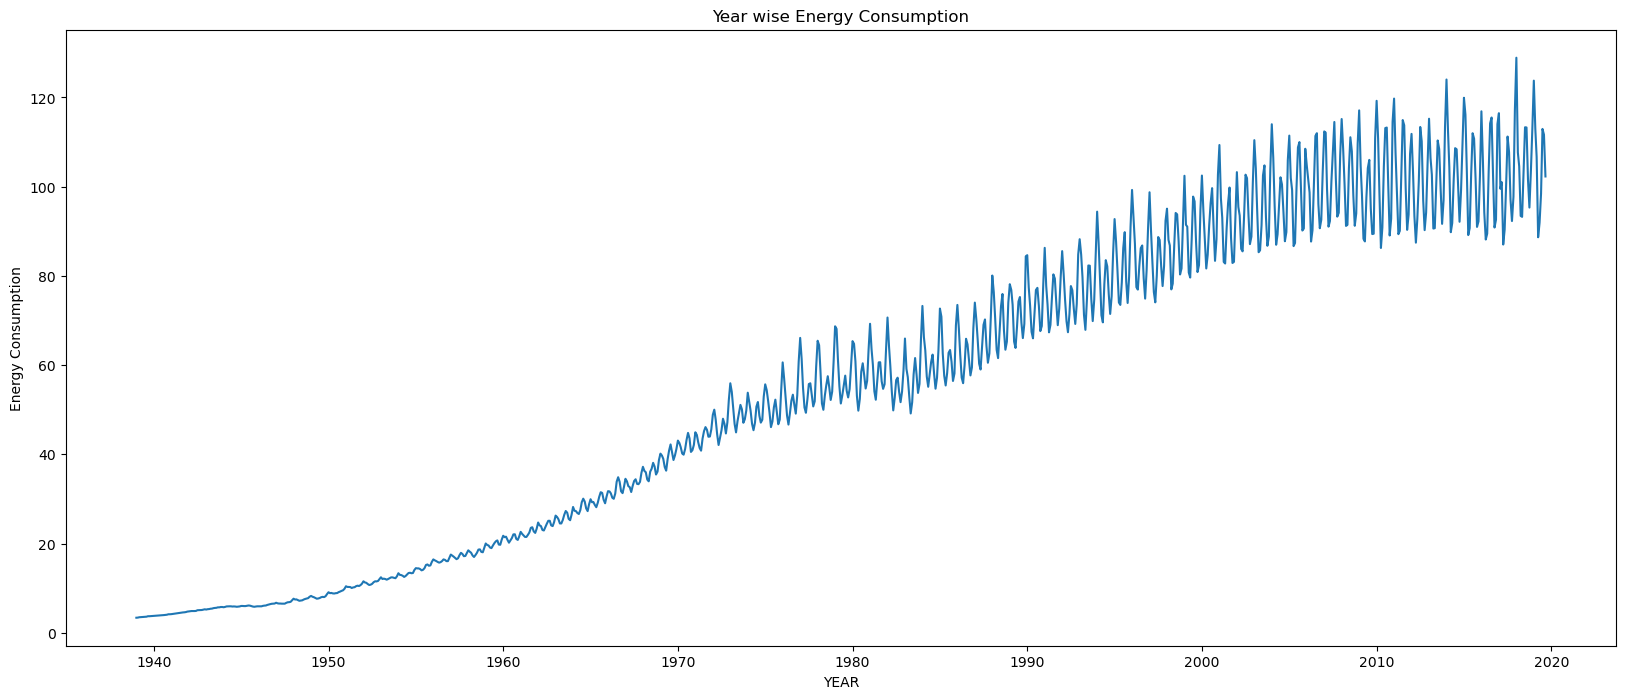

In [81]:
plt.figure(figsize=(20,8))
plt.title("Year wise Energy Consumption")
plt.plot(data)
plt.xlabel("YEAR")
plt.ylabel("Energy Consumption")
plt.show()

In [72]:
data[data["ENERGY_INDEX"]==data["ENERGY_INDEX"].max()].index,data.max(), data.min()

(DatetimeIndex(['2018-01-01'], dtype='datetime64[ns]', name='DATE', freq=None),
 ENERGY_INDEX    128.9071
 dtype: float64,
 ENERGY_INDEX    3.3842
 dtype: float64)

In [73]:
from sklearn.model_selection import train_test_split

In [123]:
train_data, valid_data = train_test_split(data["ENERGY_INDEX"],test_size=0.3,shuffle=False)

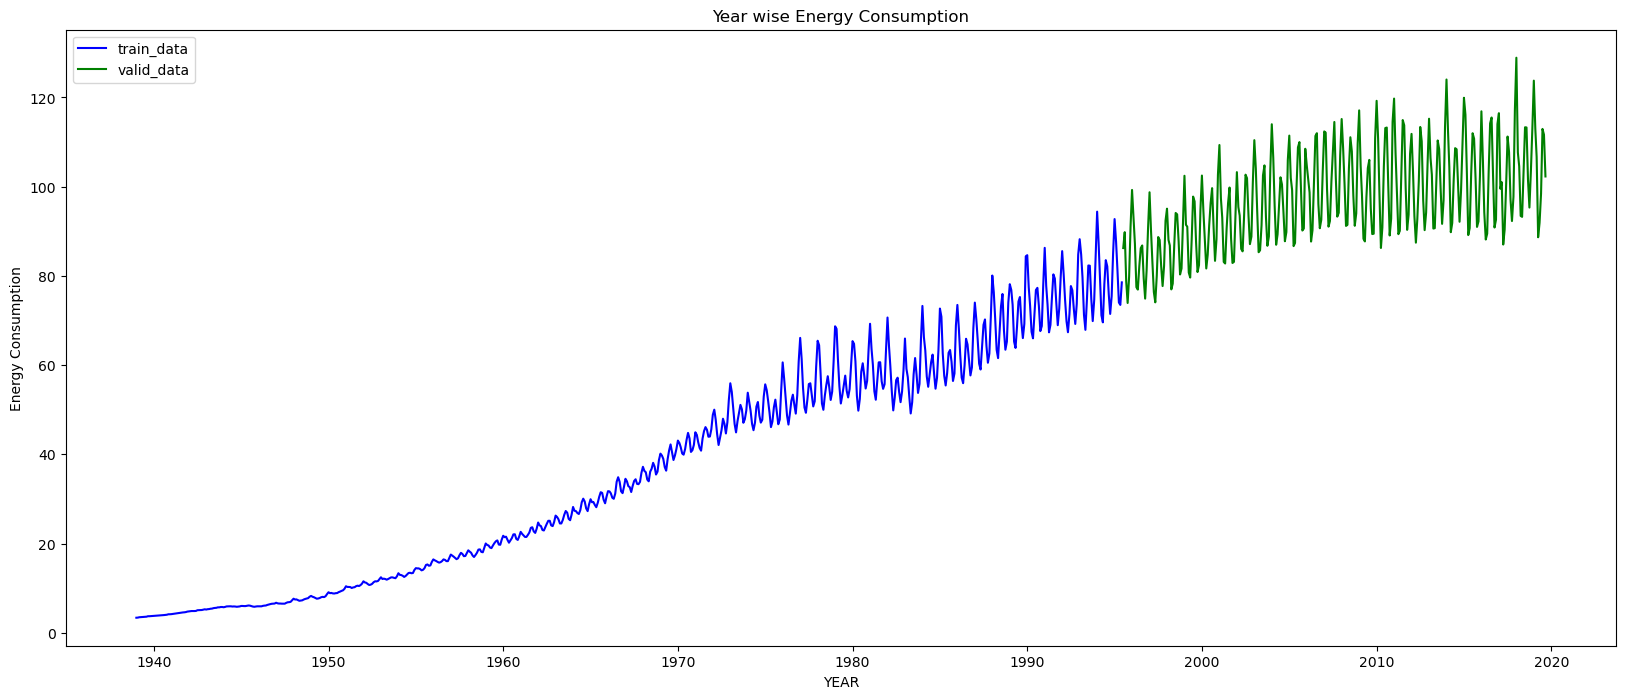

In [85]:
plt.figure(figsize=(20,8))
plt.title("Year wise Energy Consumption")
plt.plot(train_data,color='blue',label='train_data')
plt.plot(valid_data,color='green',label='valid_data')
plt.legend()
plt.xlabel("YEAR")
plt.ylabel("Energy Consumption")
plt.show()

### Simple Exponential Smoothing

In [106]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [107]:
ses = SimpleExpSmoothing(np.asarray(train_data))

In [108]:
ses = ses.fit(smoothing_level=0.4)

In [110]:
ses.forecast(len(valid_data))[:10]

array([77.90036663, 77.90036663, 77.90036663, 77.90036663, 77.90036663,
       77.90036663, 77.90036663, 77.90036663, 77.90036663, 77.90036663])

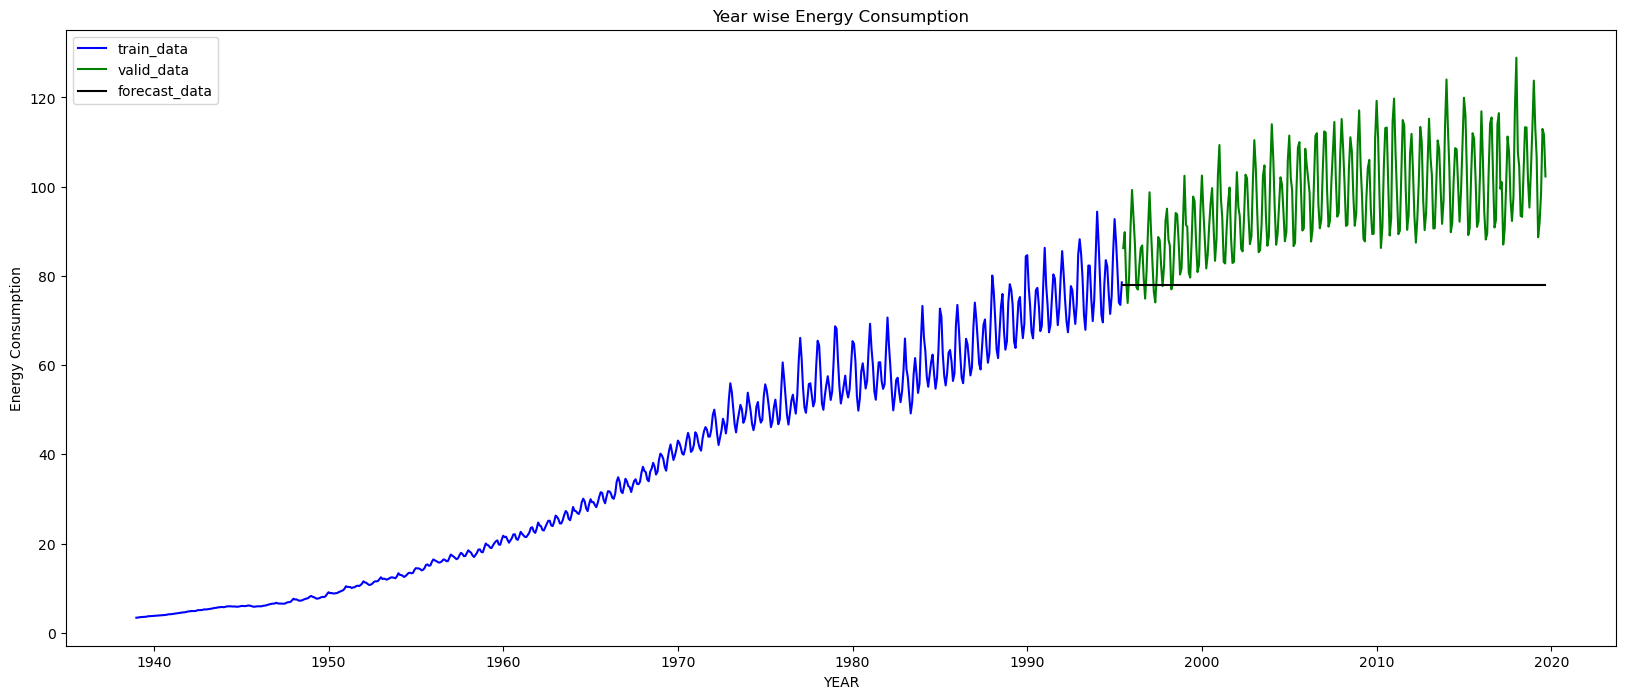

In [133]:
plt.figure(figsize=(20,8))
plt.title("Year wise Energy Consumption")
plt.plot(train_data.index,train_data,color='blue',label='train_data')
plt.plot(valid_data.index,valid_data,color='green',label='valid_data')
plt.plot(valid_data.index,ses.forecast(len(valid_data)),color='black',label='forecast_data')
plt.legend()
plt.xlabel("YEAR")
plt.ylabel("Energy Consumption")
plt.show()

### Double Exponential Smoothing

In [165]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [166]:
des = ExponentialSmoothing(np.asarray(train_data),trend='add')

In [167]:
des = des.fit()

In [170]:
des.forecast(len(valid_data))[:10]

array([78.66147917, 78.77265849, 78.88383781, 78.99501713, 79.10619645,
       79.21737577, 79.32855509, 79.43973441, 79.55091373, 79.66209305])

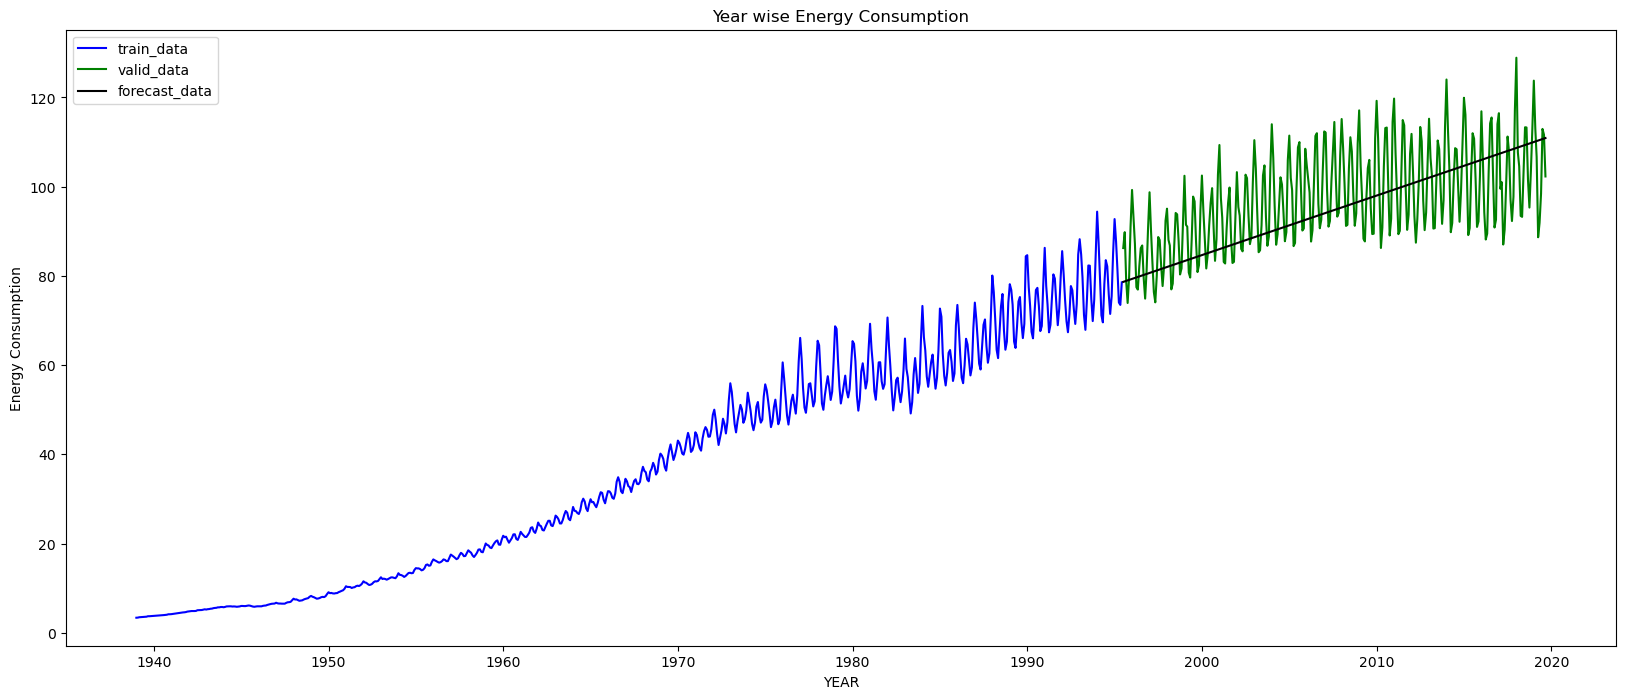

In [169]:
plt.figure(figsize=(20,8))
plt.title("Year wise Energy Consumption")
plt.plot(train_data.index,train_data,color='blue',label='train_data')
plt.plot(valid_data.index,valid_data,color='green',label='valid_data')
plt.plot(valid_data.index,des.forecast(len(valid_data)),color='black',label='forecast_data')
plt.legend()
plt.xlabel("YEAR")
plt.ylabel("Energy Consumption")
plt.show()

In [152]:
des.params

{'smoothing_level': 0.9999999698429834,
 'smoothing_trend': 1.8410782674031046e-08,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 3.2744780683063643,
 'initial_trend': 0.1111793222233768,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

### Holt Winters/Triple Exponential Smoothing

In [172]:
from statsmodels.tsa.seasonal import seasonal_decompose

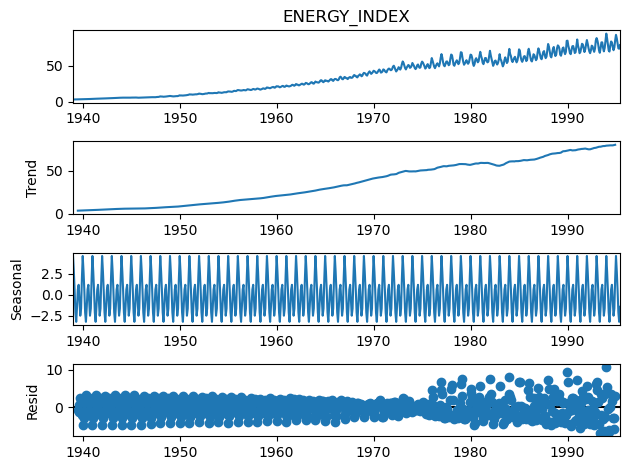

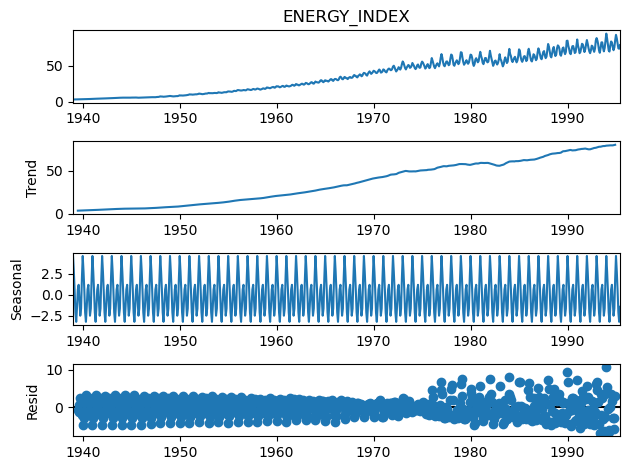

In [180]:
seasonal_decompose(train_data).plot()

In [188]:
seasonal_decompose(train_data).seasonal[:20]

DATE
1939-01-01    4.602667
1939-02-01    2.720153
1939-03-01    0.596132
1939-04-01   -2.114904
1939-05-01   -3.223015
1939-06-01   -1.438590
1939-07-01    0.607550
1939-08-01    1.173388
1939-09-01   -0.682801
1939-10-01   -2.494638
1939-11-01   -1.646775
1939-12-01    1.900832
1940-01-01    4.602667
1940-02-01    2.720153
1940-03-01    0.596132
1940-04-01   -2.114904
1940-05-01   -3.223015
1940-06-01   -1.438590
1940-07-01    0.607550
1940-08-01    1.173388
Name: seasonal, dtype: float64

Seasonality is yearly

In [171]:
from statsmodels.tsa.api import ExponentialSmoothing

In [204]:
tes = ExponentialSmoothing(np.asarray(train_data), seasonal_periods=12, trend='add', seasonal='add')

In [205]:
tes = tes.fit(remove_bias=True)

In [206]:
tes.forecast(len(valid_data))[:10]

array([85.48951564, 84.70010715, 78.73110335, 74.51433983, 78.73937569,
       88.42983571, 95.6229362 , 89.59833797, 82.8787434 , 75.22991797])

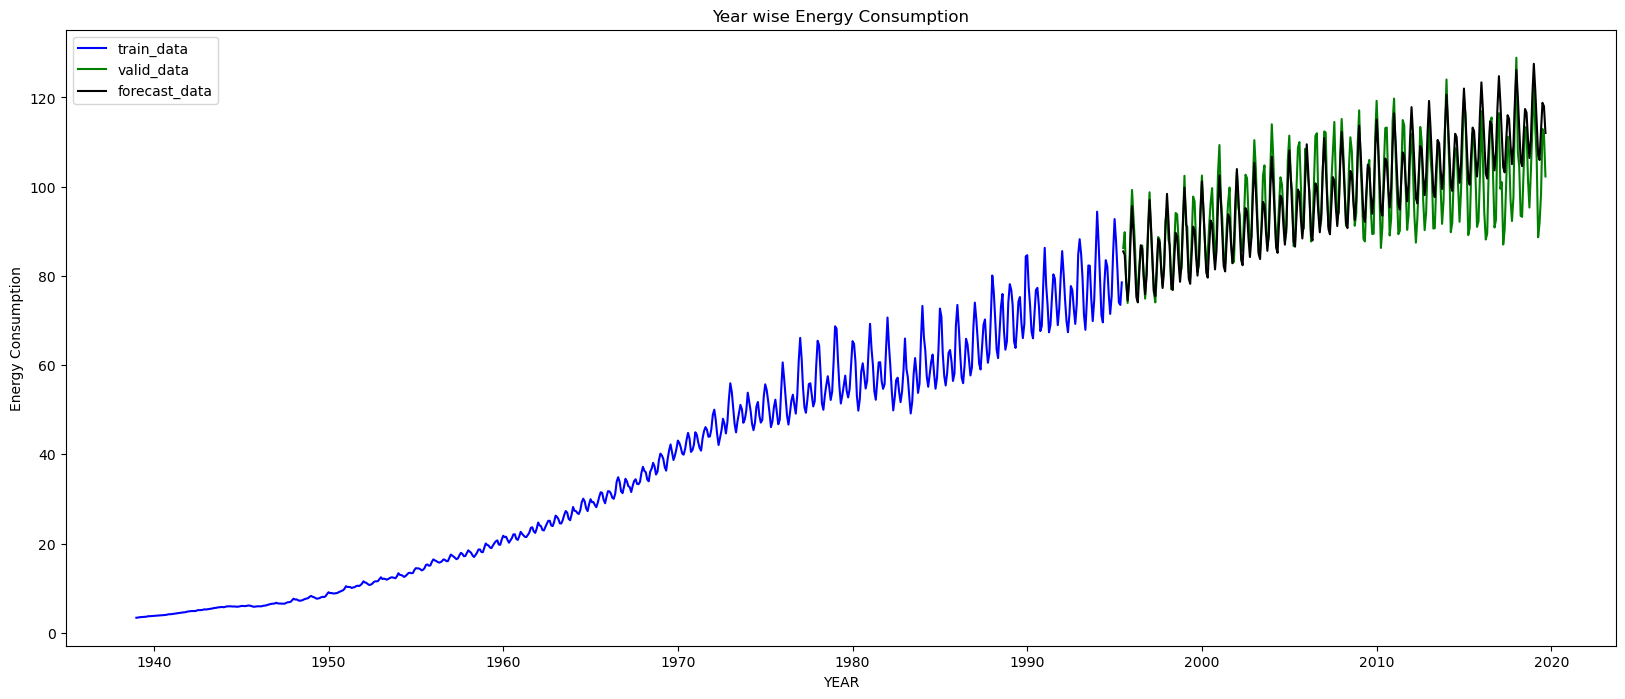

In [207]:
plt.figure(figsize=(20,8))
plt.title("Year wise Energy Consumption")
plt.plot(train_data.index,train_data,color='blue',label='train_data')
plt.plot(valid_data.index,valid_data,color='green',label='valid_data')
plt.plot(valid_data.index,tes.forecast(len(valid_data)),color='black',label='forecast_data')
plt.legend()
plt.xlabel("YEAR")
plt.ylabel("Energy Consumption")
plt.show()

In [202]:
tes.params

{'smoothing_level': 0.3150538908404882,
 'smoothing_trend': 9.69989508084121e-13,
 'smoothing_seasonal': 0.44071115353481033,
 'damping_trend': nan,
 'initial_level': 3.2110969557282116,
 'initial_trend': 0.11566342340524248,
 'initial_seasons': array([-0.00275451, -0.00713678,  0.0112496 , -0.00014349, -0.02540043,
        -0.01044839, -0.04311082, -0.05185084, -0.02944669, -0.063579  ,
        -0.05357909, -0.08494934]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

# Forecasting for the next 3 years

In [222]:
next_3_years = pd.date_range(start='2019-10-03',periods=36,freq="m")

In [217]:
tes = ExponentialSmoothing(np.asarray(data), seasonal_periods=12, trend='add', seasonal='add')

In [219]:
tes = tes.fit()

In [220]:
tes.forecast(36)

array([ 93.9975585 ,  98.90818518, 112.3969144 , 122.03734216,
       108.13209984, 102.92478696,  89.24957749,  92.09868914,
       102.11052661, 114.61460923, 113.60468867, 102.58506096,
        95.24204853, 100.15267522, 113.64140443, 123.28183219,
       109.37658987, 104.16927699,  90.49406752,  93.34317918,
       103.35501664, 115.85909926, 114.84917871, 103.82955099,
        96.48653857, 101.39716525, 114.88589447, 124.52632223,
       110.62107991, 105.41376703,  91.73855756,  94.58766921,
       104.59950668, 117.1035893 , 116.09366874, 105.07404103])

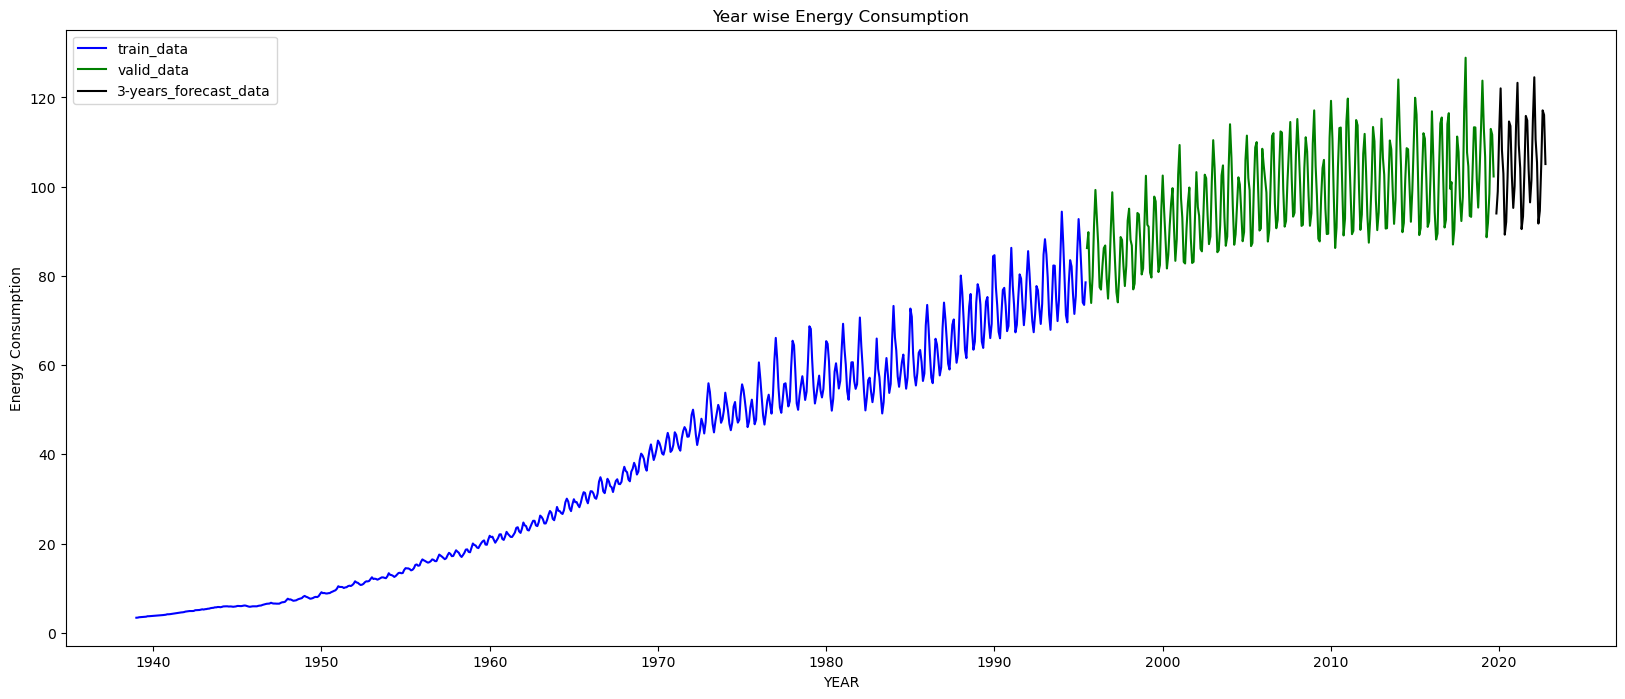

In [224]:
plt.figure(figsize=(20,8))
plt.title("Year wise Energy Consumption")
plt.plot(train_data.index,train_data,color='blue',label='train_data')
plt.plot(valid_data.index,valid_data,color='green',label='valid_data')
plt.plot(next_3_years,tes.forecast(36),color='black',label='3-years_forecast_data')
plt.legend()
plt.xlabel("YEAR")
plt.ylabel("Energy Consumption")
plt.show()